In [3]:
import pandas as pd
import json
# from tqdm import tqdm_notebook
import seaborn as sns
# from utils import add_region
sns.set(rc={"figure.figsize": (20, 10)})

ModuleNotFoundError: No module named 'tqdm'

In [2]:
PATH = "../dados/brutos/casos_covid19_16julho.csv"

In [3]:
data_df = pd.read_csv(PATH)

In [4]:
# data_df = add_region(data_df)

In [5]:
data_df.to_csv(PATH)
data_df["date"] = pd.to_datetime(data_df["date"])
data_df.sort_values(by="date", inplace=True)

In [6]:
data_df.tail()

,Unnamed: 0,Unnamed: 0.1,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source
75830,75830,75830,2020-06-16,Brazil,GO,CASO SEM LOCALIZAÇÃO DEFINIDA/GO,52,8,8,381,385,0.11399,5.48562,0.02078,SES
75829,75829,75829,2020-06-16,Brazil,CE,CASO SEM LOCALIZAÇÃO DEFINIDA/CE,23,29,71,1436,3585,0.77748,39.25722,0.01980,SES
75828,75828,75828,2020-06-16,Brazil,DF,Brasília/DF,5300108,15,334,442,24126,11.07696,800.12788,0.01384,SES
75831,75831,75831,2020-06-16,Brazil,MG,CASO SEM LOCALIZAÇÃO DEFINIDA/MG,31,21,34,296,674,0.16061,3.18393,0.05045,SES
75837,75837,75837,2020-06-16,Brazil,TOTAL,TOTAL,0,527,44665,12760,904624,21.25416,430.47175,0.04937,NaN


In [7]:
data_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'country', 'state', 'city',
       'ibgeID', 'newDeaths', 'deaths', 'newCases', 'totalCases',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', '_source'],
      dtype='object')

# Análise do Brasil

In [8]:
brasil_df = data_df[data_df["state"] == "TOTAL"]
brasil_df.set_index("date", inplace=True)
brasil_df.sort_index(inplace=True)

In [9]:
brasil_df.head()

,Unnamed: 0,Unnamed: 0.1,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source
date,,,,,,,,,,,,,,
2020-02-25,1,1,Brazil,TOTAL,TOTAL,0,0,0,1,1,0.0,0.00048,0.0,NaN
2020-02-28,3,3,Brazil,TOTAL,TOTAL,0,0,0,1,2,0.0,0.00095,0.0,NaN
2020-03-04,5,5,Brazil,TOTAL,TOTAL,0,0,0,1,3,0.0,0.00143,0.0,NaN
2020-03-05,8,8,Brazil,TOTAL,TOTAL,0,0,0,4,7,0.0,0.00333,0.0,NaN
2020-03-06,13,13,Brazil,TOTAL,TOTAL,0,0,0,7,14,0.0,0.00666,0.0,NaN


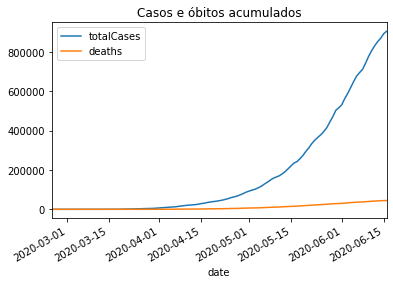

In [10]:
brasil_df[["totalCases", "deaths"]].plot(title="Casos e óbitos acumulados")

# Análise de estados

In [11]:
aux_df = data_df[data_df["state"] != "TOTAL"].groupby(["date", "state"]).sum()
aux_df.reset_index(inplace=True)

In [12]:
aux_df

,date,state,Unnamed: 0,Unnamed: 0.1,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
0,2020-02-25,SP,0,0,3550308,0,0,1,1,0.00000,0.00816,0.00000
1,2020-02-28,SP,2,2,3550308,0,0,1,2,0.00000,0.01632,0.00000
2,2020-03-04,SP,4,4,3550308,0,0,1,3,0.00000,0.02449,0.00000
3,2020-03-05,RJ,6,6,3300407,0,0,1,1,0.00000,0.54226,0.00000
4,2020-03-05,SP,7,7,3550308,0,0,3,6,0.00000,0.04897,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2394,2020-06-16,MS,75832,75832,50,3,3,234,234,0.10795,8.42034,0.01282
2395,2020-06-16,PE,75833,75833,26,73,124,920,1255,1.29747,13.13164,0.09880
2396,2020-06-16,RR,75834,75834,14,13,15,54,142,2.47622,23.44159,0.10563
2397,2020-06-16,SP,75835,75835,35,365,365,8825,8928,0.79488,19.44291,0.04088


In [13]:
estados_df = aux_df.set_index("date").pivot(columns="state")

In [14]:
estados_df.tail()

Unnamed: 0                                                          \
state              AC         AL         AM        AP          BA          CE   
date                                                                            
2020-06-12   988622.0  3956788.0  2959014.0  919577.0   8962581.0   8248369.0   
2020-06-13  1084800.0  4623375.0  3317073.0  939241.0   7726187.0     71654.0   
2020-06-14  1104026.0  4789080.0  2208969.0  664413.0  10018818.0   7803520.0   
2020-06-15   901719.0  4657418.0  2326874.0  902904.0   7885877.0  10510389.0   
2020-06-16        NaN        NaN        NaN       NaN         NaN     75829.0   

                                                      ...  \
state            DF         ES         GO         MA  ...   
date                                                  ...   
2020-06-12  69946.0  4304943.0  2470058.0  7200694.0  ...   
2020-06-13  71628.0  3107647.0   576343.0  6351662.0  ...   
2020-06-14  73157.0  3682777.0   809941.0  4495458.0  ...   
2020-06-15  74554.0  4806142.0  6083432.0  6312370.0  ...   
2020-06-16  75828.0        NaN    75830.0        NaN  ...   

           deaths_by_totalCases                                               \
state                        PR       RJ       RN       RO       RR       RS   
date                                                                           
2020-06-12              1.17309  4.20465  2.36121  0.41752  0.17292  3.40290   
2020-06-13              3.23531  4.20473  0.01415  0.66590  0.03792  1.19318   
2020-06-14              3.36792  3.36437  0.05353  0.61868  0.05458  0.48867   
2020-06-15              1.71944  3.36082      NaN  0.02540      NaN  4.46772   
2020-06-16                  NaN      NaN      NaN      NaN  0.10563      NaN   

                                                 
state            SC       SE        SP       TO  
date                                             
2020-06-12  1.27683  2.58349  11.42645  0.01070  
2020-06-13  0.45498  2.96556  13.86171  0.01754  
2020-06-14  1.00384  2.73652  10.07289  1.60204  
2020-06-15  1.46216  0.01289   7.08769      NaN  
2020-06-16      NaN      NaN   0.04088  0.00000  

[5 rows x 270 columns]

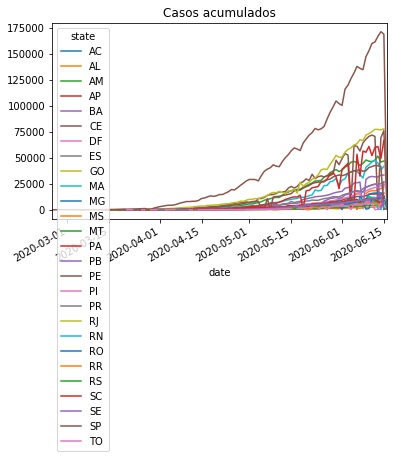

In [15]:
estados_df["totalCases"].plot(title="Casos acumulados")

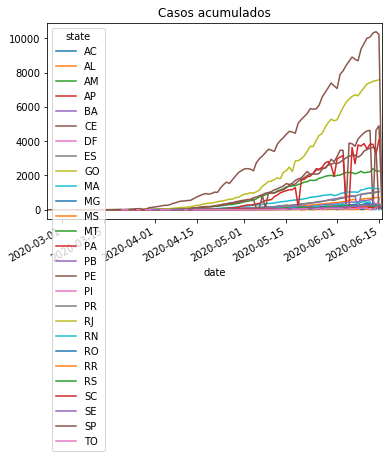

In [16]:
estados_df["deaths"].plot(title="Casos acumulados")

# Análise de regiões

In [17]:
regioes_df = data_df[data_df["region"] != "TOTAL"].groupby(["date", "region"]).sum()

KeyError: 'region'

In [18]:
regioes_df.tail(5)

NameError: name 'regioes_df' is not defined

In [19]:
# Indexando apenas pela data
regioes_df = regioes_df.reset_index().set_index("date")

NameError: name 'regioes_df' is not defined

In [20]:
regioes_df

NameError: name 'regioes_df' is not defined

In [21]:
final_reg_df = regioes_df.pivot(columns="region")
final_reg_df["totalCases"].plot(title="Casos acumulados")

NameError: name 'regioes_df' is not defined

In [22]:
final_reg_df["deaths"].plot(title="Óbitos acumulados")

NameError: name 'final_reg_df' is not defined

# Visualização dos dados mais recentes

In [23]:
final_reg_df.iloc[-1]["totalCases"]

NameError: name 'final_reg_df' is not defined

In [24]:
final_reg_df.iloc[-1]["totalCases"].plot.bar(rot=45, color=["brown", "yellow", "green", "red", "blue", "pink"], title="Casos acumulados até o momento")

NameError: name 'final_reg_df' is not defined

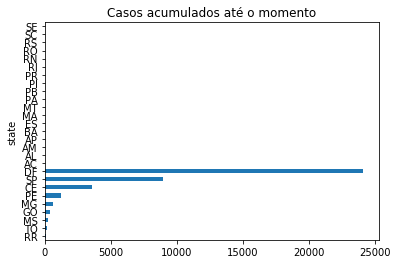

In [25]:
estados_df.iloc[-1]["totalCases"].sort_values().plot.barh(title="Casos acumulados até o momento")

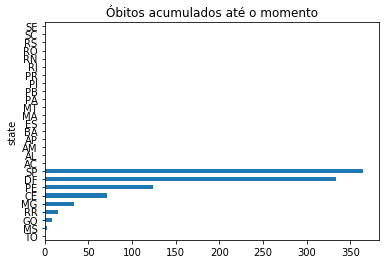

In [26]:
estados_df.iloc[-1]["deaths"].sort_values().plot.barh(title="Óbitos acumulados até o momento")

In [27]:
estado2sigla = json.load(open("../dados/siglas_estados.json", "r"))
sigla2estado = {sigla : estado for (estado, sigla) in estado2sigla.items()}

In [28]:
estados = data_df[data_df["state"] != "TOTAL"]["state"].unique()

In [29]:
estado_summary = pd.DataFrame(index=estados)

In [30]:
estado_summary["casos"] = [estados_df.iloc[-1]["totalCases"][estado] for estado in estados]
estado_summary["obitos"] = [estados_df.iloc[-1]["deaths"][estado] for estado in estados]
estado_summary.rename(index=sigla2estado, inplace=True)

In [31]:
estado_summary

,casos,obitos
São Paulo,8928.0,365.0
Rio de Janeiro,NaN,NaN
Espírito Santo,NaN,NaN
Bahia,NaN,NaN
Distrito Federal,24126.0,334.0
Alagoas,NaN,NaN
Minas Gerais,674.0,34.0
Rio Grande do Sul,NaN,NaN
Pernambuco,1255.0,124.0
Goiás,385.0,8.0


In [32]:
estado_summary.to_excel("../dados/processados/casos_obitos_por_estado.xlsx")

ModuleNotFoundError: No module named 'openpyxl'